<a href="https://colab.research.google.com/github/laduqueo/Proyecto_Final_SyS/blob/main/Conceptos_clave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conceptos Clave

# 1. Transformada de Fourier (FT, DFT, FFT)


## ¿Qué es la Transformada de Fourier?

La Transformada de Fourier es una herramienta fundamental en procesamiento de señales que permite analizar una señal en el dominio de la frecuencia, es decir, descomponerla en las ondas senoidales que la componen.

En lugar de observar cómo varía la señal en el tiempo (dominio temporal), la Transformada de Fourier nos permite ver **qué frecuencias contiene esa señal y con qué intensidad**, proporcionando una visión más profunda de su estructura.

Este cambio de perspectiva es clave para muchas aplicaciones prácticas, como compresión, filtrado, análisis espectral y transmisión de señales.



## ¿Por qué transformar una señal al dominio de la frecuencia?

Porque muchas características importantes de una señal **no son visibles en el tiempo**, pero sí en frecuencia. Por ejemplo:

- Una señal puede parecer caótica en el tiempo, pero tener frecuencias bien definidas.
- Un ruido puede tener componentes de alta frecuencia que queremos eliminar.
- Un sistema puede afectar solo ciertas frecuencias de una señal.

Al transformar una señal al dominio de la frecuencia, podemos detectar patrones, eliminar ruido, identificar frecuencias dominantes, entre otras cosas.



## Tipos de Transformadas de Fourier

Existen diferentes versiones de la Transformada de Fourier, cada una adaptada al tipo de señal que se quiere analizar. A continuación se explican las más comunes:

###  1. FT – Transformada de Fourier (Continua)

Se aplica a señales continuas en el tiempo, como $x(t)$. Convierte la señal en una función continua de frecuencia $X(f)$.

$$X(f) = \int_{-\infty}^{\infty} x(t) \cdot e^{-j2\pi f t} \, dt$$

Esta transformada nos dice cuánta energía tiene la señal en cada frecuencia. El resultado, $X(f)$, es generalmente complejo, por lo que se analiza su magnitud (intensidad) y fase (desfase relativo).

*Ejemplo típico*: análisis de señales eléctricas o acústicas analógicas, como una onda senoidal continua o una vibración mecánica.


###  2. DTFT – Transformada de Fourier de Tiempo Discreto

Se aplica a señales discretas (muestreadas), pero **infinitas en duración**. La variable de frecuencia es continua, pero en forma angular ($\omega$).

$$X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] \cdot e^{-j\omega n}$$

*Es útil en análisis teórico de señales digitales*, ya que nos da la respuesta espectral completa de una señal muestreada, aunque no se pueda calcular directamente (por ser infinita).


###  3. DFT – Transformada Discreta de Fourier

La DFT es una versión práctica y computable: se aplica a señales **discretas y de duración finita** (por ejemplo, un vector de datos).

$$X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j \frac{2\pi}{N}kn}, \quad k = 0, 1, \dots, N-1$$

Cada índice $k$ representa una frecuencia específica:

$$f_k = \frac{k}{N} \cdot f_s$$

donde $f_s$ es la frecuencia de muestreo. El resultado es periódico, por lo que normalmente se analiza solo la mitad del espectro (parte positiva).

*Es la herramienta base en procesamiento digital de señales*, como en archivos de audio o imágenes.


###  4. FFT – Fast Fourier Transform

La FFT no es una transformada distinta, sino un **algoritmo eficiente para calcular la DFT**.

Mientras que una DFT convencional requiere un número de operaciones proporcional a $N^2$, la FFT reduce esto a $N \log N$, lo que permite:

- Procesamiento en tiempo real.
- Análisis de señales de gran tamaño.
- Menor consumo de recursos computacionales.

*La FFT es la base de muchas aplicaciones en tiempo real*: audio, radar, diagnóstico médico, comunicaciones móviles, etc.


## ¿Para qué se utiliza la Transformada de Fourier?

| Aplicación | Ejemplo |
|---|---|
| Análisis espectral | Identificar las frecuencias presentes en una señal. |
| Filtrado | Eliminar frecuencias no deseadas (ej. ruido de 60 Hz). |
| Compresión | Usada en MP3 o JPEG para eliminar información redundante. |
| Reconocimiento de patrones | Análisis de ECG, EEG o firmas acústicas. |
| Sistemas de comunicación | Modulación y demodulación de señales, multiplexación. |


## Ejemplo práctico

Supongamos que una señal está compuesta por dos ondas senoidales:

$$x(t) = \sin(2\pi \cdot 50t) + 0.5 \cdot \sin(2\pi \cdot 120t)$$

Esto significa que la señal contiene dos frecuencias:

- Una componente fuerte en 50 Hz
- Una componente más débil en 120 Hz

Cuando aplicamos la Transformada de Fourier a esta señal, obtenemos un **espectro que muestra dos picos en esas frecuencias**. Esto valida que esas son las frecuencias que realmente componen la señal.


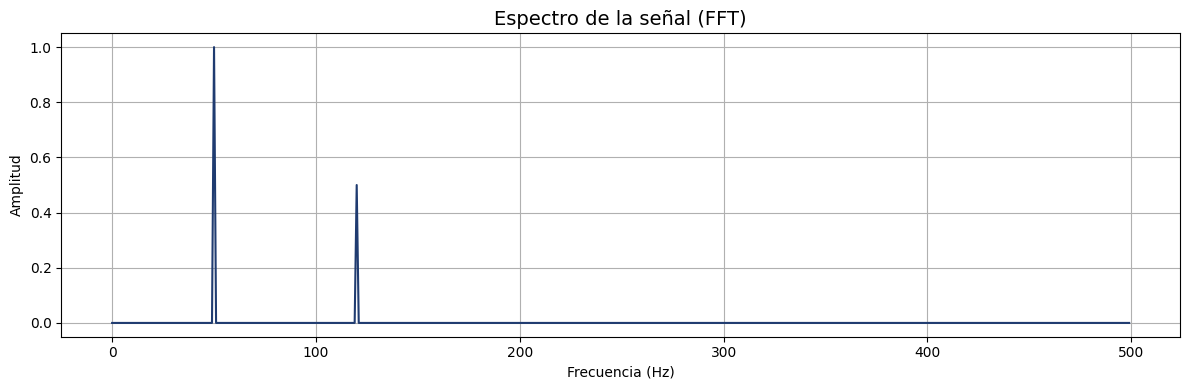

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Parámetros de la señal
# ----------------------------
fs = 1000     # Frecuencia de muestreo (Hz)
T = 1         # Duración total de la señal (s)
t = np.linspace(0, T, int(fs * T), endpoint=False)

# ----------------------------
# Señal compuesta: 50 Hz y 120 Hz
# ----------------------------
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)

# ----------------------------
# Cálculo de la FFT
# ----------------------------
N = len(x)
X = np.fft.fft(x)
f = np.fft.fftfreq(N, d=1/fs)

# ----------------------------
# Ajuste de magnitud y eje
# ----------------------------
X_magnitude = (2.0 / N) * np.abs(X[:N // 2])  # Magnitud normalizada (solo parte positiva)
f_positive = f[:N // 2]                       # Solo frecuencias positivas

# ----------------------------
# Gráfica del espectro
# ----------------------------
plt.figure(figsize=(12, 4))
plt.plot(f_positive, X_magnitude, color='#1f3b70')  # Azul metálico
plt.title('Espectro de la señal (FFT)', fontsize=14)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.tight_layout()
plt.show()

## Interpretación del Espectro de Frecuencias

Una vez aplicamos la Transformada de Fourier (usando la FFT), obtenemos una representación en el **dominio de la frecuencia**. Esta representación nos muestra **qué frecuencias componen la señal original y con qué intensidad**.


### ¿Qué muestra el gráfico generado?

Al ejecutar la celda de código que calcula y grafica la FFT, obtenemos una gráfica con las siguientes características:

- **Eje X (Frecuencia en Hz):**
  Representa las distintas frecuencias presentes en la señal. Va desde 0 Hz hasta la **mitad de la frecuencia de muestreo** (por el teorema de Nyquist).

- **Eje Y (Magnitud):**
  Muestra la **intensidad o contribución de cada frecuencia** en la señal original. Una mayor magnitud indica una frecuencia más fuerte o dominante.


### ¿Por qué se muestra solo la mitad del espectro?

La FFT de una señal real genera un espectro simétrico (parte positiva y negativa). Sin embargo, en la mayoría de los casos **solo se muestra la mitad positiva**, ya que la otra mitad es redundante. A esto se le llama **espectro unilateral**.


### ¿Cómo interpretar los picos?

Cada **pico en la gráfica** corresponde a una frecuencia presente en la señal. En el ejemplo anterior:

$$x(t) = \sin(2\pi \cdot 50t) + 0.5 \cdot \sin(2\pi \cdot 120t)$$

veremos dos picos principales:

- Uno en **50 Hz**, con mayor altura (amplitud 1).
- Otro en **120 Hz**, con menor altura (amplitud 0.5).

Esto confirma que la señal está compuesta por esas dos frecuencias. Además, no hay otros picos significativos, lo que indica que no hay otras frecuencias relevantes en la señal.



### ¿Qué ocurre si hay ruido?

Si la señal tuviera ruido (por ejemplo, una señal aleatoria sumada), se verían **otras componentes de frecuencia dispersas** y de menor magnitud. En esos casos, este análisis permite identificar el ruido y aplicar filtrado.


## Conclusión

El espectro obtenido mediante la FFT nos permite:

- **Visualizar las frecuencias presentes**.
- Determinar **cuáles son dominantes y cuáles no**.
- Verificar si una señal es pura o compleja.
- Establecer una base para filtrado, compresión o análisis más profundo.

Este análisis es fundamental en **telecomunicaciones, audio, electromedicina, imágenes y muchas otras áreas** donde entender la frecuencia de una señal es esencial.

# 2. Filtrado Digital (FIR / IIR)

##¿Qué es un filtro digital?

Un filtro digital es un sistema o algoritmo que procesa señales digitales para modificar su contenido en frecuencia. Es como un "ecualizador inteligente" que puede eliminar ruidos, destacar ciertos rangos de frecuencias o suavizar una señal.

Aplicaciones comunes:

- Eliminar ruido o interferencias.
- Resaltar o suprimir ciertas bandas de frecuencia (bajos, agudos).
- Preprocesamiento de datos en sistemas de comunicación, audio o sensores.



##¿Cómo clasificamos los filtros?

Podemos clasificarlos según:

- Su respuesta al impulso: FIR o IIR.
- El tipo de frecuencias que dejan pasar o bloquean: pasa-bajo, pasa-alto, etc.


###Filtros FIR (Respuesta Finita al Impulso)

Un filtro FIR (Finite Impulse Response) responde a un impulso durante un tiempo limitado (su respuesta termina después de unas pocas muestras).

Características:

- No tiene retroalimentación (no depende de salidas pasadas).
- Siempre es estable.
- Puede diseñarse con fase lineal (no distorsiona la forma de la señal).
- Más fácil de diseñar y controlar.

Ecuación general:

$$y[n] = \sum_{k=0}^{N} b_k \cdot x[n - k]$$

Cada salida es una combinación lineal de las entradas actuales y pasadas.

Los coeficientes $b_k$ determinan el comportamiento del filtro.

###Filtros IIR (Respuesta Infinita al Impulso)

Un filtro IIR (Infinite Impulse Response) puede responder indefinidamente a un solo impulso debido a la retroalimentación.

Características:

- Usa entradas y también salidas anteriores.
- Más eficiente: requiere menos coeficientes que un FIR para lograr un efecto similar.
- Puede ser inestable si no se diseña correctamente.
- No garantiza fase lineal.

Ecuación general:

$$y[n] = \sum_{k=0}^{M} b_k \cdot x[n - k] - \sum_{k=1}^{N} a_k \cdot y[n - k]$$

Esta fórmula combina entradas pasadas y salidas pasadas: tiene realimentación.


##Comparación FIR vs IIR
| Característica             | FIR                            | IIR                          |
|----------------------------|--------------------------------|-------------------------------|
| Estabilidad                | Siempre estable                | Puede ser inestable          |
| Fase lineal                | Sí (puede diseñarse así)       | No necesariamente            |
| Uso de salidas pasadas     | No                             | Sí (tiene retroalimentación) |
| Eficiencia                 | Menor                          | Mayor                        |
| Complejidad de diseño      | Más simple                     | Más compleja                 |



##Tipos de filtros según la frecuencia

| Tipo de filtro     | ¿Qué hace?                                         | Ejemplo práctico                                |
|--------------------|----------------------------------------------------|-------------------------------------------------|
| Pasa-bajo          | Deja pasar frecuencias bajas, atenúa las altas     | Suavizar una señal de sensor                    |
| Pasa-alto          | Deja pasar frecuencias altas, atenúa las bajas     | Eliminar fluctuaciones lentas                   |
| Pasa-banda         | Solo deja pasar un rango específico de frecuencias | Detectar una frecuencia vocal específica        |
| Rechaza-banda      | Atenúa un rango específico, deja pasar el resto    | Eliminar interferencias (como 60 Hz)            |


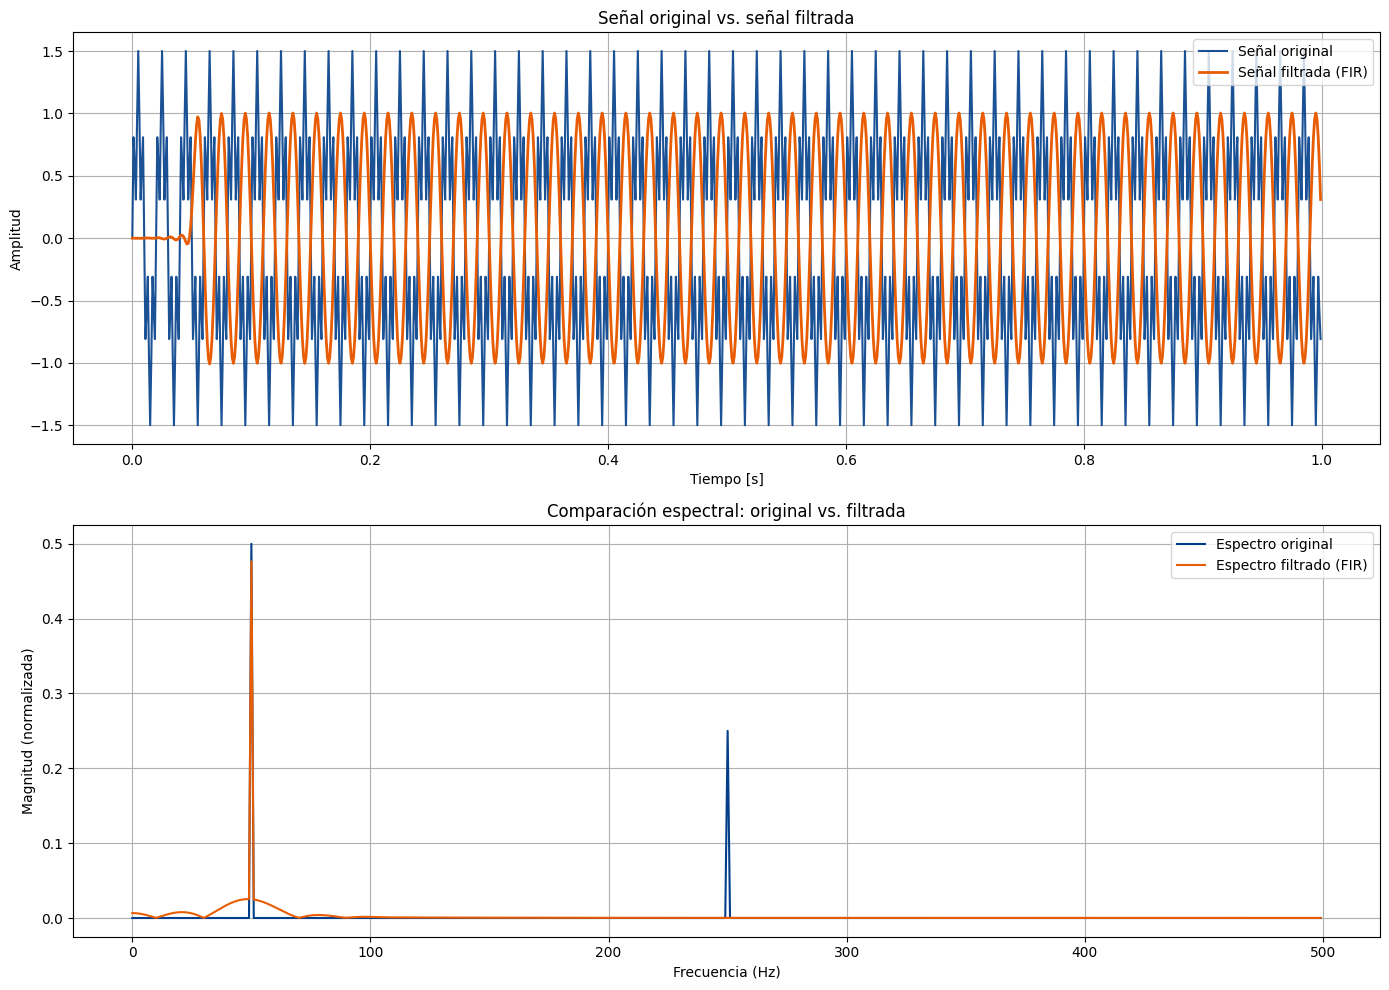

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz
from numpy.fft import fft, fftfreq
import warnings

# Ignorar advertencias por números complejos al graficar
warnings.filterwarnings("ignore")

# -------------------------------------
# Parámetros de simulación
# -------------------------------------
fs = 1000            # Frecuencia de muestreo (Hz)
t = np.linspace(0, 1.0, fs, endpoint=False)  # 1 segundo

# Señal original: combinación de 2 frecuencias (50 Hz y 250 Hz)
x = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*250*t)

# -------------------------------------
# DISEÑO DEL FILTRO FIR PASA-BAJO
# -------------------------------------
cutoff = 100     # Frecuencia de corte en Hz
numtaps = 101    # Número de coeficientes (orden del filtro + 1)

# Diseño con ventana de Hamming
fir_coeff = firwin(numtaps=numtaps, cutoff=cutoff, fs=fs, window='hamming')

# Aplicación del filtro a la señal
y = lfilter(fir_coeff, 1.0, x)

# -------------------------------------
# RESPUESTA EN FRECUENCIA DEL FILTRO
# -------------------------------------
w, h = freqz(fir_coeff, worN=8000)
frequencies = (w / np.pi) * (fs / 2)

# -------------------------------------
# FFT NORMALIZADA PARA ANÁLISIS ESPECTRAL
# -------------------------------------
N = len(t)
X = np.abs(fft(x)) / N
Y = np.abs(fft(y)) / N
freqs = fftfreq(N, d=1/fs)
half = N // 2  # Solo parte positiva del espectro

# -------------------------------------
# VISUALIZACIÓN
# -------------------------------------

# Colores metálicos oscuros
color_azul_oscuro = '#023e8a'     # Azul metálico más oscuro
color_naranja_intenso = '#e85d04' # Naranja metálico más fuerte

plt.figure(figsize=(14, 10))

# 1. Señal original y filtrada (dominio temporal)
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Señal original', color=color_azul_oscuro, alpha=0.9)
plt.plot(t, y, label='Señal filtrada (FIR)', color=color_naranja_intenso, linewidth=2)
plt.title('Señal original vs. señal filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# 2. Espectro: original vs. filtrada
plt.subplot(2, 1, 2)
plt.plot(freqs[:half], X[:half], color=color_azul_oscuro, label='Espectro original')
plt.plot(freqs[:half], Y[:half], color=color_naranja_intenso, label='Espectro filtrado (FIR)')
plt.title('Comparación espectral: original vs. filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (normalizada)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. Señales Analíticas y Transformada de Hilbert


##¿Qué es la Transformada de Hilbert?

La Transformada de Hilbert es una operación matemática que convierte una señal real $x(t)$ en una nueva señal $\hat{x}(t)$ que está desfasada $90^\circ$ respecto a la original.

Esta transformación no altera la amplitud de las componentes de frecuencia, pero sí modifica su fase, desplazándola $\pm 90^\circ$ dependiendo del signo de la frecuencia.



##¿Para qué se utiliza?

La Transformada de Hilbert es esencial en procesamiento de señales porque permite:

- Construir una señal analítica compleja a partir de una real:
$$z(t) = x(t) + j\hat{x}(t)$$
- Separar la señal en dos componentes:
    - Componente en fase (I): la señal original $x(t)$.
    - Componente en cuadratura (Q): la señal transformada $\hat{x}(t)$.
- Obtener información clave como:
    - Envolvente: $|z(t)| = \sqrt{x^2(t) + \hat{x}^2(t)}$
    - Fase instantánea: $\phi(t) = \arg(z(t)) = \arctan\left(\frac{\hat{x}(t)}{x(t)}\right)$

Estas propiedades son fundamentales en modulación AM-SSB, FM, QAM, y en análisis de señales no estacionarias.


##¿Cómo se define matemáticamente?

La Transformada de Hilbert de una señal $x(t)$ se expresa como:

$$\hat{x}(t) = \mathcal{H}\{x(t)\} = \frac{1}{\pi} \cdot \text{p.v.} \int_{-\infty}^{\infty} \frac{x(\tau)}{t - \tau} \, d\tau$$

Donde:

- $\mathcal{H}{\cdot}$ representa la Transformada de Hilbert.
- p.v. indica que se toma el valor principal de Cauchy (para evitar la singularidad en $t = \tau$).


##Interpretación intuitiva

Visualmente, aplicar la Transformada de Hilbert es como "girar" todas las componentes senoidales de una señal $90^\circ$:

- Una onda $\cos(\omega t)$ se convierte en $\sin(\omega t)$.

Por eso, si sumamos ambas como parte real e imaginaria, obtenemos una señal compleja rotante, útil para análisis avanzados.


###Ejemplo práctico en Python

A continuación, se aplica la Transformada de Hilbert a una senoidal de 50 Hz:

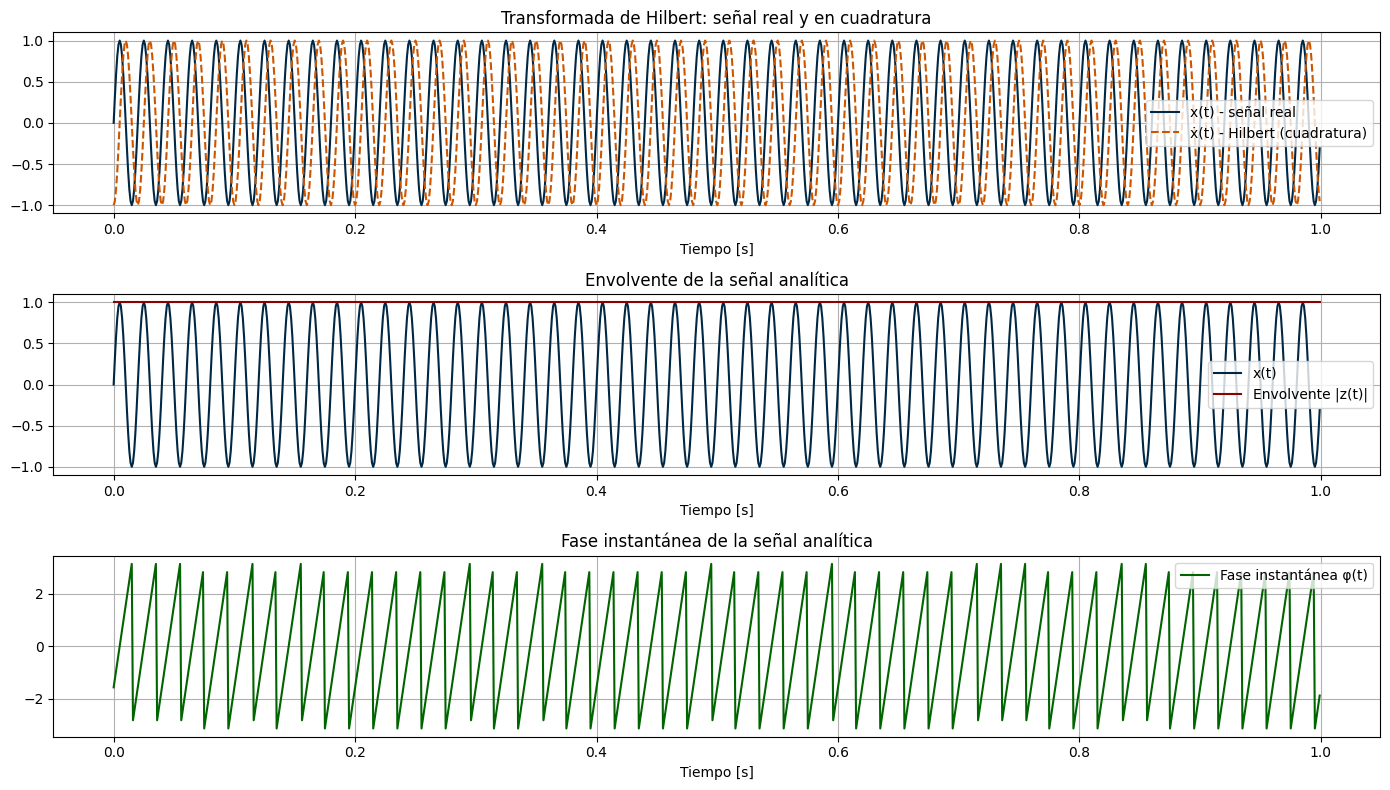

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parámetros
fs = 1000         # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)
f = 50            # Frecuencia de la señal

# Señal real
x = np.sin(2 * np.pi * f * t)

# Transformada de Hilbert → señal analítica
z = hilbert(x)
xh = np.imag(z)          # Parte imaginaria (cuadratura)
envolvente = np.abs(z)   # Envolvente
fase = np.angle(z)       # Fase instantánea

# Colores oscuros exactos
azul_oscuro = '#002744'
naranja_oscuro = '#cc5500'
rojo_oscuro = '#8b0000'
verde_oscuro = '#006400'

# Gráficas
plt.figure(figsize=(14, 8))

# 1. Señal original y cuadratura
plt.subplot(3, 1, 1)
plt.plot(t, x, label='x(t) - señal real', color=azul_oscuro)
plt.plot(t, xh, label='ẋ(t) - Hilbert (cuadratura)', linestyle='--', color=naranja_oscuro)
plt.title('Transformada de Hilbert: señal real y en cuadratura')
plt.xlabel('Tiempo [s]')
plt.grid(True)
plt.legend()

# 2. Envolvente
plt.subplot(3, 1, 2)
plt.plot(t, x, label='x(t)', color=azul_oscuro)
plt.plot(t, envolvente, label='Envolvente |z(t)|', color=rojo_oscuro)
plt.title('Envolvente de la señal analítica')
plt.xlabel('Tiempo [s]')
plt.grid(True)
plt.legend()

# 3. Fase instantánea
plt.subplot(3, 1, 3)
plt.plot(t, fase, label='Fase instantánea φ(t)', color=verde_oscuro)
plt.title('Fase instantánea de la señal analítica')
plt.xlabel('Tiempo [s]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Resultado visual esperado

* 1. Señal en cuadratura

$$\hat{x}(t)$$

La señal en cuadratura es la Transformada de Hilbert de la señal original $x(t)$.

Aparece en la gráfica como una versión desfasada 90°, es decir, alcanza sus máximos y mínimos un cuarto de ciclo después que $x(t)$.

Si $x(t)$ es una senoide, $\hat{x}(t)$ será una cosenoide (o viceversa, con signo negativo).

Esta componente es imaginaria en la señal analítica $z(t) = x(t) + j\hat{x}(t)$ y representa la parte en cuadratura, fundamental en análisis I/Q (in-phase/quadrature).

Interpretación: te permite "completar" la señal real con una segunda dimensión que contiene toda la información de fase.

* 2. Envolvente

$$|z(t)| = \sqrt{x^2(t) + \hat{x}^2(t)}$$

La envolvente es la magnitud de la señal analítica, y representa cómo varía la amplitud total de una señal modulada con el tiempo.

Si la señal tiene modulación de amplitud (AM), la envolvente revelará la forma de esa modulación.

En una señal pura como una senoide, la envolvente es constante.

Pero si la señal tiene variaciones, ruidos o múltiples frecuencias, la envolvente resalta la envoltura de los picos.

Interpretación: es útil para detectar patrones lentos, energía localizada o modulaciones ocultas en señales más complejas.

* 3. Fase instantánea

$$\phi(t) = \arg(z(t)) = \arctan\left(\frac{\hat{x}(t)}{x(t)}\right)$$

La fase instantánea representa el ángulo de rotación de la señal compleja $z(t)$ en el plano complejo.

Para una señal pura $x(t) = \cos(2\pi f t)$, la fase instantánea crece linealmente con el tiempo: $\phi(t) = 2\pi f t$.

Si hay una modulación en frecuencia (FM), la derivada de esta fase nos da la frecuencia instantánea.

En señales reales, la fase instantánea puede revelar desplazamientos, variaciones locales o saltos de fase que no se ven en el dominio temporal.

Interpretación: es clave para entender cambios dinámicos de fase o frecuencia, como en comunicaciones digitales o detección de eventos transitorios.

# 4. Señales I/Q y Modulación QAM

##¿Qué son las señales I/Q?

Las señales I/Q (In-Phase y Quadrature) son una forma muy común de representar señales moduladas en sistemas de comunicación modernos, como WiFi, televisión digital, 5G, etc.

En lugar de trabajar con una señal única, esta representación separa la información en dos componentes reales:

- $I(t)$: la componente en fase (in-phase), que se asocia con una señal cosenoidal.
- $Q(t)$: la componente en cuadratura (quadrature), que se asocia con una señal senoidal, pero desfasada $90^\circ$ respecto a $I(t)$.

Estas dos señales se combinan para formar una señal modulada:

$$s(t)=I(t) \cdot \cos(2\pi f_c t) - Q(t) \cdot \sin(2\pi f_c t)$$

Donde:

- $f_c$ es la frecuencia de portadora.
- $I(t)$ y $Q(t)$ pueden cambiar con el tiempo y así modificar la señal transmitida.

##¿Para qué sirve separar en I y Q?

Separar una señal en I y Q permite controlar de forma independiente dos aspectos clave:

- La amplitud (cuánto "fuerte" es la señal).
- La fase (en qué punto del ciclo se encuentra la señal).

Esto es fundamental para muchas técnicas modernas de modulación, ya que nos permite transmitir más información por cada símbolo que enviamos.


##¿Qué es la modulación QAM?

QAM (Quadrature Amplitude Modulation) es una técnica de modulación que utiliza tanto la amplitud como la fase para codificar datos.
Combina dos tipos de modulación:

- Modulación de amplitud (AM): varía el tamaño de la señal.
- Modulación de fase (PM): varía el ángulo de la señal.

La clave de QAM es que cada combinación de I y Q forma un símbolo único, que puede representarse como un punto en un plano, llamado constelación QAM.


##¿Cuántos bits se pueden transmitir?

Cada punto de la constelación representa una combinación diferente de bits. Cuantos más puntos tenga la constelación, más bits por símbolo se pueden transmitir:

| Tipo de QAM   | Bits por símbolo | Puntos en la constelación |
|---------------|------------------|----------------------------|
| 4-QAM         | 2 bits           | 4                          |
| 16-QAM        | 4 bits           | 16                         |
| 64-QAM        | 6 bits           | 64                         |
| 256-QAM       | 8 bits           | 256                        |


Ejemplo práctico: Si estás transmitiendo con 64-QAM, cada símbolo transporta 6 bits. Esto permite una transmisión mucho más rápida que solo usar 2 bits por símbolo (como en 4-QAM).


##¿Por qué es tan útil?

- Aumenta la eficiencia del uso del espectro (más datos en menos tiempo).
- Es la base de muchas tecnologías modernas: LTE, 5G, DVB, WiFi, etc.
- Permite ajustar dinámicamente el número de bits por símbolo, dependiendo de la calidad del canal.

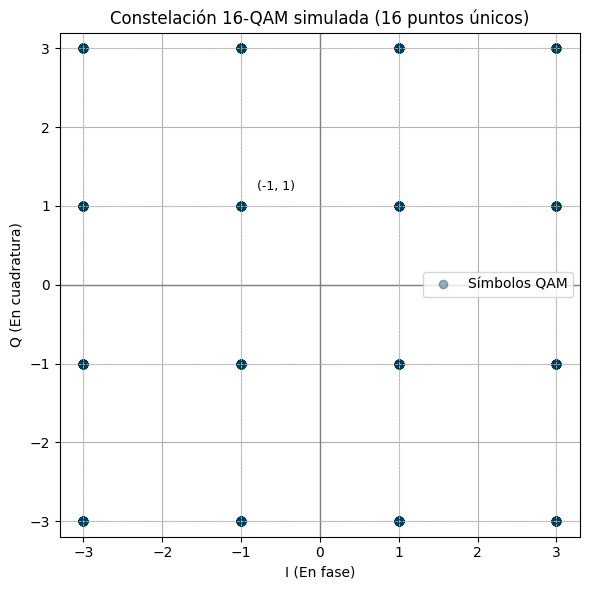

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mapeo QAM (4 niveles en I y Q): {-3, -1, +1, +3}
niveles = [-3, -1, 1, 3]

# Número de símbolos
N = 1000

# Generar I y Q aleatorios
I = np.random.choice(niveles, size=N)
Q = np.random.choice(niveles, size=N)

# Formar señal compleja (modulada)
s = I + 1j * Q

# Graficar constelación
plt.figure(figsize=(6, 6))

# Puntos de la constelación con azul oscuro
plt.plot(np.real(s), np.imag(s), 'o', color='#003f5c', alpha=0.4, label='Símbolos QAM')

# Ejes principales
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

# Líneas guías para mostrar niveles de I y Q
for level in niveles:
    plt.axhline(level, color='lightgray', linestyle='--', linewidth=0.5)
    plt.axvline(level, color='lightgray', linestyle='--', linewidth=0.5)

# Anotar el primer símbolo como ejemplo
plt.text(np.real(s[0]) + 0.2, np.imag(s[0]) + 0.2, f"({I[0]}, {Q[0]})", fontsize=9, color='black')

# Configuración del gráfico
plt.title(f'Constelación 16-QAM simulada ({len(set(s))} puntos únicos)')
plt.xlabel('I (En fase)')
plt.ylabel('Q (En cuadratura)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

##¿Qué representa la gráfica de la constelación QAM?

La gráfica muestra una constelación de modulación QAM (Quadrature Amplitude Modulation). Cada punto azul representa un símbolo que transmite información usando dos componentes:

I (In-phase): valor sobre el eje horizontal

Q (Quadrature): valor sobre el eje vertical

La combinación de ambos determina la posición del símbolo en el plano.

##¿Cómo varía según los niveles?
En el ejemplo, se usan 4 niveles posibles para I y Q: −3, −1, +1 y +3, generando una constelación de 16 puntos (16-QAM).

Si se aumentan los niveles, por ejemplo a 8, se obtiene 64-QAM, con más puntos y más información por símbolo.

Si se reducen, como en 4-QAM, hay menos símbolos, lo que hace el sistema más robusto pero transmite menos datos.

##¿Por qué es importante?
Más puntos (mayor orden QAM) → mayor eficiencia espectral (más bits por símbolo), pero también mayor susceptibilidad al ruido.

Menos puntos → más tolerante a errores, útil en canales ruidosos.

Este tipo de representación es clave en sistemas de comunicación modernos como 5G, WiFi, televisión digital y radio definida por software (SDR).

# 5. OFDM – Multiplexación por División de Frecuencia Ortogonal

##¿Qué es OFDM?

OFDM (Orthogonal Frequency Division Multiplexing) es una técnica de modulación avanzada que se utiliza ampliamente en sistemas modernos de comunicación como WiFi, LTE, 5G, DVB-T y más.

La idea central de OFDM es dividir el canal disponible en muchas subportadoras más pequeñas, y transmitir información en cada una de forma simultánea y paralela.

En lugar de enviar todos los datos por una única frecuencia (como lo haría AM, FM o incluso QAM básica), OFDM distribuye la información en muchas pequeñas frecuencias, lo que mejora la eficiencia y la resistencia al ruido.

##¿Por qué se llaman "subportadoras ortogonales"?
Las subportadoras de OFDM están cuidadosamente espaciadas de manera que cumplen una propiedad matemática llamada ortogonalidad. Esto significa que, aunque las portadoras estén solapadas en frecuencia, no interfieren entre sí.

Matemáticamente, dos señales son ortogonales si su producto integrado en el tiempo da cero:

$$\int_0^T \cos(2\pi f_i t) \cdot \cos(2\pi f_j t)\,dt = 0 \quad \text{si } i \neq j$$

Esto permite que las señales puedan compartir espectro sin interferencia, aprovechando el canal al máximo.

##¿Cómo funciona OFDM paso a paso?

* División de bits: Los datos digitales se agrupan en bloques.

* Asignación a subportadoras: Cada grupo de bits se asigna a una portadora diferente.

* Modulación de cada portadora: Cada subportadora se modula con técnicas como QAM o PSK.

* IFFT (Transformada Inversa de Fourier): Se convierte la señal del dominio de frecuencia al dominio del tiempo para poder transmitirla.

* Transmisión: Se transmite la suma de todas las subportadoras moduladas.
En el receptor:

* Se aplica la FFT (Transformada de Fourier Rápida) para separar nuevamente cada subportadora.

* Se recuperan los símbolos y se decodifican los bits.

##¿Por qué se usa OFDM?

* Alta eficiencia espectral: Muchas subportadoras en un mismo canal.

* Tolerancia a interferencias: Menos afectación por desvanecimientos o ruido en una sola frecuencia.

* Facilidad para corregir errores: Al tener múltiples canales, se puede usar

* corrección de errores más eficazmente.

* Resistente a dispersión temporal: Ideal en entornos con rebotes o ecos (por ejemplo, ciudades).

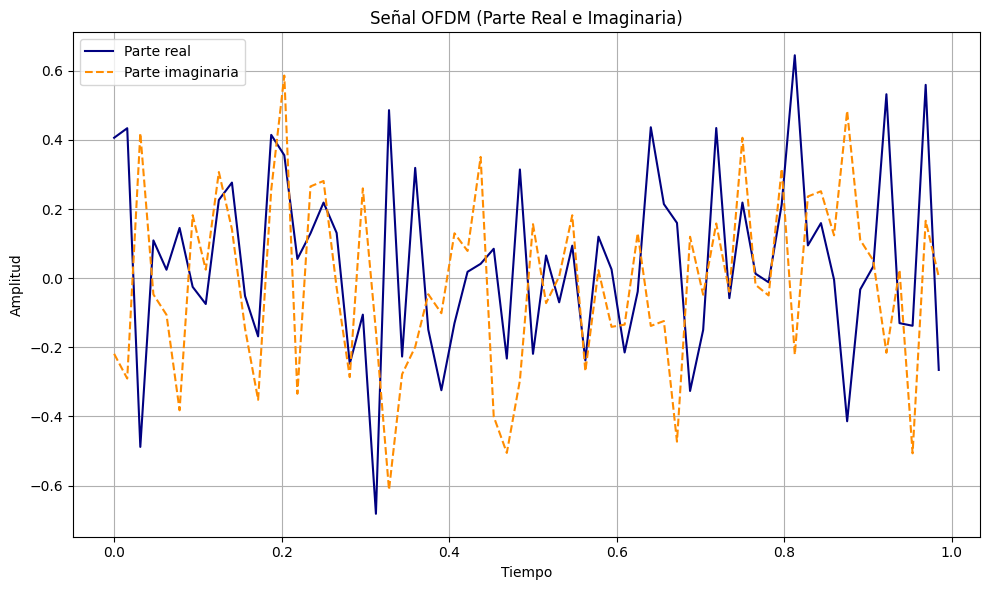

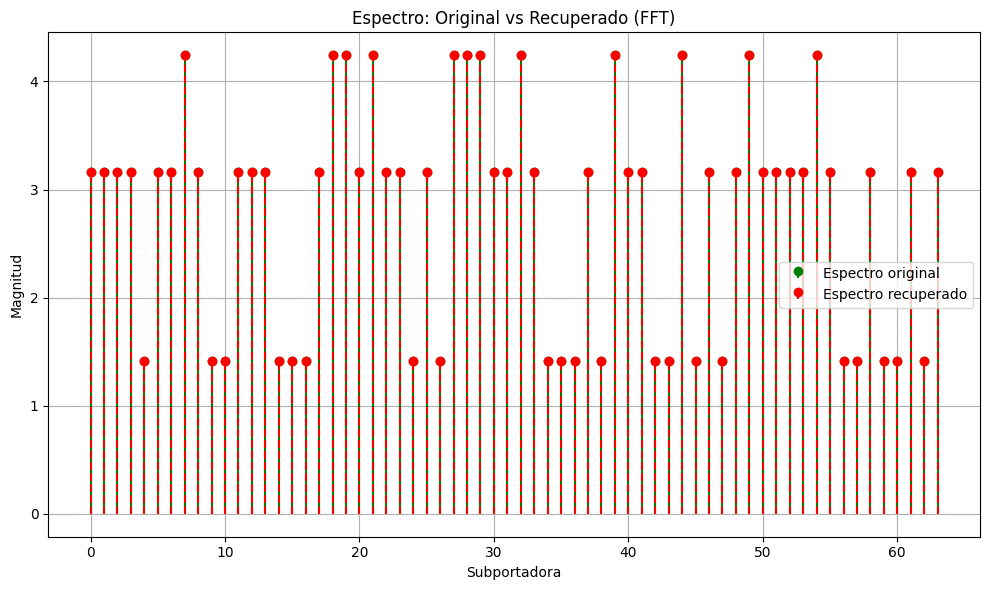

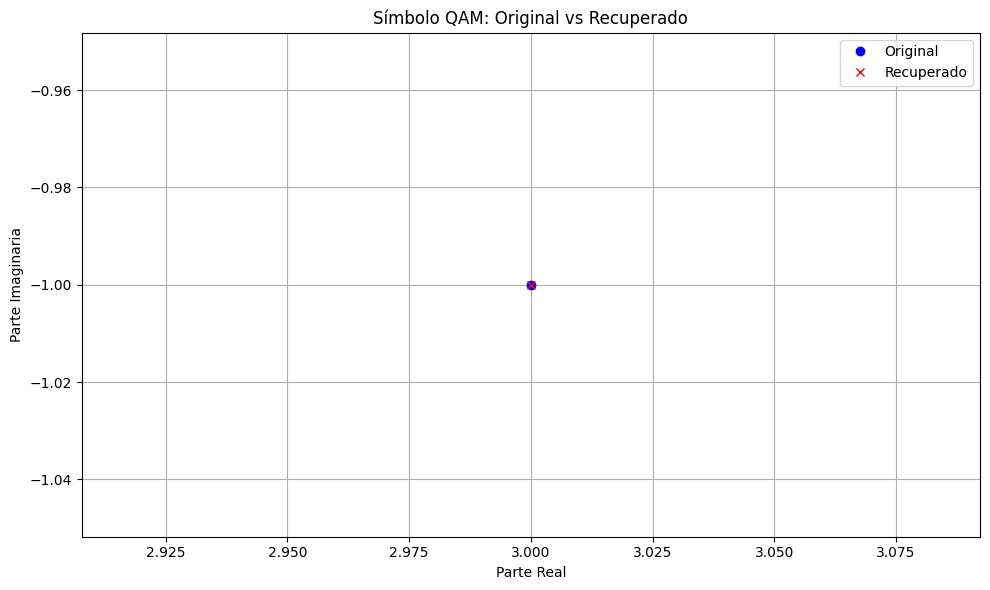

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------
# PARÁMETROS CONFIGURABLES
# -----------------------------------------------
N = 64  # Número de subportadoras (puedes cambiarlo)
niveles = [-3, -1, 1, 3]  # Niveles QAM (16-QAM)

# -----------------------------------------------
# 1. GENERACIÓN DE SÍMBOLOS QAM
# -----------------------------------------------
I = np.random.choice(niveles, size=N)
Q = np.random.choice(niveles, size=N)
X = I + 1j * Q  # Símbolos QAM en el dominio de la frecuencia

# Guardamos un símbolo de ejemplo para análisis posterior
idx = np.random.randint(N)
symbol_original = X[idx]

# -----------------------------------------------
# 2. SEÑAL OFDM EN EL TIEMPO (IFFT)
# -----------------------------------------------
ofdm_signal = np.fft.ifft(X)
t = np.linspace(0, 1, N, endpoint=False)

# -----------------------------------------------
# 3. VISUALIZACIÓN DE PARTE REAL E IMAGINARIA
# -----------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(t, np.real(ofdm_signal), label='Parte real', color='navy')
plt.plot(t, np.imag(ofdm_signal), label='Parte imaginaria', color='darkorange', linestyle='--')  # <- Entre cortada
plt.title('Señal OFDM (Parte Real e Imaginaria)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 4. ESPECTRO ORIGINAL vs RECUPERADO
# -----------------------------------------------
received_signal = ofdm_signal  # Canal ideal
X_rec = np.fft.fft(received_signal)

plt.figure(figsize=(10, 6))
plt.stem(np.abs(X), linefmt='g-', markerfmt='go', basefmt=' ', label='Espectro original')
plt.stem(np.abs(X_rec), linefmt='r--', markerfmt='ro', basefmt=' ', label='Espectro recuperado')
plt.title('Espectro: Original vs Recuperado (FFT)')
plt.xlabel('Subportadora')
plt.ylabel('Magnitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 5. COMPARACIÓN DE UN SÍMBOLO QAM ANTES Y DESPUÉS
# -----------------------------------------------
symbol_received = X_rec[idx]

plt.figure(figsize=(10, 6))
plt.plot(np.real(symbol_original), np.imag(symbol_original), 'bo', label='Original')
plt.plot(np.real(symbol_received), np.imag(symbol_received), 'rx', label='Recuperado')
plt.title('Símbolo QAM: Original vs Recuperado')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()


# 6. Comunicaciones WiFi y 5G

##¿Qué son WiFi y 5G?

WiFi y 5G son tecnologías que permiten la transmisión de datos de forma inalámbrica usando ondas electromagnéticas. Aunque se usan en contextos distintos (WiFi en redes locales como hogares u oficinas, y 5G en redes móviles de amplio alcance), ambas se basan en principios técnicos similares que permiten transmitir gran cantidad de información de forma eficiente, rápida y confiable.

Ambas tecnologías utilizan:

Modulación digital por amplitud en cuadratura (QAM)
Multiplexación mediante división ortogonal de frecuencias (OFDM)
Representación en componentes I (en fase) y Q (en cuadratura)
Transformadas rápidas de Fourier (FFT e IFFT)
Filtrado digital para reducir interferencias
Estas técnicas permiten que múltiples usuarios transmitan datos simultáneamente, con alta velocidad y baja latencia.

##¿Cómo funciona el proceso de transmisión?
El proceso completo, desde que se generan los datos hasta que se transmiten, puede resumirse así:

1. Codificación y Modulación QAM
Los bits (ceros y unos) se agrupan en bloques y se convierten en símbolos QAM.

Cada símbolo representa un punto en el plano I/Q, determinado por una amplitud y una fase específica. Entre más niveles tenga la modulación (por ejemplo, 16-QAM, 64-QAM, 256-QAM), más bits se codifican por símbolo.

2. Multiplexación OFDM
Los símbolos QAM se distribuyen entre varias subportadoras ortogonales. Esto permite enviar varios símbolos en paralelo, cada uno usando una frecuencia diferente.

Se aplica la IFFT para transformar las subportadoras del dominio de la frecuencia al dominio del tiempo, generando la señal OFDM que se transmite.

3. Generación de señales I/Q
La señal OFDM se separa en dos componentes:

Componente en fase I(t)
Componente en cuadratura Q(t), desfasada 90° respecto a I(t)

Estas dos señales permiten representar de forma completa la modulación QAM-OFDM.

4. Transmisión
Se modula una portadora con I(t) y Q(t) de esta manera:

$$s(t)=I(t)\cos(2\pi f_c t) - Q(t)\sin(2\pi f_c t)$$

Esta señal es la que finalmente se transmite por la antena.

5. Recepción y demodulación

En el receptor, se invierten los pasos anteriores:

- Se captura la señal recibida
- Se extraen las componentes I y Q
- Se aplica la FFT para separar las subportadoras
- Se identifican los símbolos QAM
- Finalmente, se recuperan los bits originales
- Este proceso se repite constantemente, permitiendo enviar y recibir datos como videos, mensajes o llamadas en tiempo real.